In [1]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.datasets import mnist
import itertools
import random

import sys
sys.path.append('../')
from Core_Functions import multi_hot_encoding
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Create an input array of 50,000 samples of 20 random numbers each
x = np.random.randint(0, 10, size=(50000, 2))

# And a one-hot encoded target denoting the index of the maximum of the inputs
y = []
x = []
for ints in range(50000):
    
    x1 = np.random.randint(0,10)
    x2 = np.random.randint(0,10)
    
    if x1!= x2:
        y.append([x1,x2])
        x.append([min(x1,x2), max(x1,x2)])


In [3]:
y

[[4, 3],
 [6, 3],
 [2, 0],
 [4, 2],
 [5, 7],
 [5, 7],
 [7, 8],
 [3, 6],
 [6, 5],
 [0, 5],
 [5, 2],
 [0, 5],
 [2, 5],
 [1, 2],
 [6, 8],
 [5, 2],
 [1, 7],
 [5, 1],
 [4, 6],
 [8, 6],
 [2, 9],
 [2, 9],
 [0, 6],
 [6, 8],
 [9, 5],
 [6, 9],
 [3, 5],
 [8, 4],
 [3, 6],
 [9, 1],
 [7, 6],
 [9, 3],
 [1, 2],
 [9, 1],
 [8, 7],
 [6, 8],
 [8, 2],
 [3, 9],
 [4, 2],
 [2, 9],
 [0, 4],
 [9, 7],
 [8, 1],
 [1, 5],
 [5, 6],
 [7, 8],
 [4, 7],
 [3, 2],
 [0, 3],
 [9, 2],
 [3, 0],
 [1, 3],
 [4, 8],
 [1, 6],
 [7, 0],
 [8, 6],
 [1, 6],
 [4, 3],
 [1, 2],
 [4, 5],
 [7, 8],
 [3, 9],
 [6, 9],
 [8, 5],
 [0, 7],
 [3, 2],
 [1, 6],
 [1, 5],
 [1, 2],
 [2, 3],
 [6, 1],
 [1, 3],
 [4, 9],
 [2, 8],
 [0, 5],
 [6, 5],
 [9, 1],
 [1, 6],
 [8, 3],
 [1, 4],
 [5, 0],
 [8, 0],
 [1, 0],
 [5, 8],
 [3, 8],
 [0, 4],
 [5, 4],
 [7, 3],
 [5, 2],
 [3, 8],
 [6, 8],
 [3, 7],
 [1, 7],
 [8, 9],
 [6, 4],
 [8, 6],
 [2, 6],
 [3, 2],
 [0, 3],
 [4, 8],
 [5, 1],
 [0, 9],
 [6, 3],
 [0, 2],
 [3, 4],
 [3, 1],
 [8, 9],
 [5, 3],
 [0, 7],
 [3, 4],
 [0, 8],
 

In [4]:
# Create an input array of 50,000 samples of 20 random numbers each
x_val = np.random.randint(0, 10, size=(50000, 2))

# And a one-hot encoded target denoting the index of the maximum of the inputs
y_val = []
x_val = []
for ints in range(50000):
    
    x1 = np.random.randint(0,10)
    x2 = np.random.randint(0,10)
    
    if x1!= x2:
        y_val.append([x1,x2])
        x_val.append([max(x1,x2), min(x1,x2)])


In [5]:
# Conversion to umopy arrays
x = np.array(x)
y = np.array(y)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [6]:
y

array([[4, 3],
       [6, 3],
       [2, 0],
       ...,
       [9, 8],
       [9, 6],
       [2, 3]])

In [7]:
# Here instead of using to_categorical, I use my custom multi-hot encoding
"""
train_labels = to_categorical(combo_train_y)
val_labels = to_categorical(combo_val_y)
"""

y = np.array(multi_hot_encoding.multi_hot_encode(y))
y_val =  np.array(multi_hot_encoding.multi_hot_encode(y_val))

In [8]:
# # Model architecture
# def build_DNN():

#     model = tf.keras.Sequential()
#     model.add(layers.Dense(512, activation = 'relu', input_shape=(2,)))
#     model.add(layers.Dense(10, activation='softmax'))

#     model.compile(optimizer='rmsprop', 
#                 loss='categorical_crossentropy', 
#                 metrics=['accuracy', 'mae'])

#     return model

In [9]:
# DNN_model = build_DNN()
# DNN_model.summary()

In [10]:
# # Fit model
# DNN_model.fit(x, 
#           y, 
#           epochs = 5, 
#           batch_size = 1)


In [11]:
# # Print loss, mae and accuracy
# DNN_eval_model = DNN_model.evaluate(val_images, val_labels)
# DNN_accuracy.append(DNN_eval_model[1])

In [12]:
def build_DNN_10_outputs():

    inputs = keras.Input(shape=(2,))

    dense = layers.Dense(512, activation="relu")
    x = dense(inputs)

    outputs = layers.Dense(10, "sigmoid")(x)
    
    model = keras.Model(inputs = inputs,
                       outputs = outputs)

    model.compile(
        loss=keras.losses.BinaryCrossentropy(),
        optimizer=keras.optimizers.RMSprop(),
        metrics=["accuracy", "mae"],
    )
    
    return model

In [13]:
dnn_model = build_DNN_10_outputs()

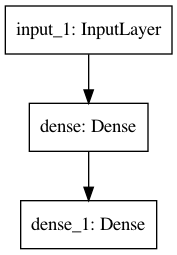

In [14]:
tf.keras.utils.plot_model(dnn_model)

In [15]:
np.array(x).shape

(44950, 2)

In [16]:
y.shape

(44950, 10)

In [18]:
# dnn_model.fit(x, 
#           y, 
#           epochs = 10, 
#           batch_size = 1)

# dnn_model.evaluate(x_val, y_val)

In [19]:
history = dnn_model.fit(x, 
          y, 
          epochs = 5, 
          batch_size = 1,
          validation_data = (x_val, y_val))

val_mae_history = history.history['val_mae']
train_mae_history = history.history['mae']

Epoch 1/5
44950/44950 [==============================] - 38s 841us/step - loss: 0.0587 - accuracy: 0.3970 - mae: 0.0328 - val_loss: 15.0928 - val_accuracy: 0.2423 - val_mae: 0.3656
Epoch 2/5
44950/44950 [==============================] - 39s 862us/step - loss: 0.0191 - accuracy: 0.7176 - mae: 0.0070 - val_loss: 20.8251 - val_accuracy: 0.2225 - val_mae: 0.3662
Epoch 3/5
44950/44950 [==============================] - 39s 863us/step - loss: 0.0135 - accuracy: 0.8281 - mae: 0.0040 - val_loss: 23.1508 - val_accuracy: 0.2454 - val_mae: 0.3662
Epoch 4/5
44950/44950 [==============================] - 38s 839us/step - loss: 0.0100 - accuracy: 0.8473 - mae: 0.0026 - val_loss: 26.4336 - val_accuracy: 0.2657 - val_mae: 0.3662
Epoch 5/5
44950/44950 [==============================] - 38s 850us/step - loss: 0.0098 - accuracy: 0.8938 - mae: 0.0024 - val_loss: 26.8861 - val_accuracy: 0.2879 - val_mae: 0.3662


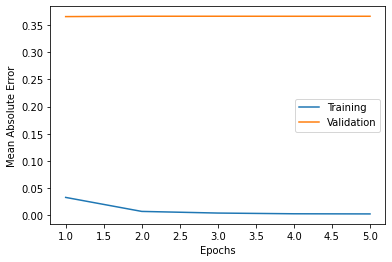

In [20]:
plt.plot(range(1, len(train_mae_history) + 1), train_mae_history, label = 'Training')
plt.plot(range(1, len(val_mae_history) + 1), val_mae_history, label='Validation')

plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()